In [27]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt

In [55]:
rand = pd.read_csv('logs/default/lr0.0050_bs64_cp30_a2.00_e1_r0_n100_f0.03/rand_rr0.10_dr0.75_lr0.005_bs64_cp30_a2.00_e1_r0_n100_f0.03_p6.csv', skiprows=range(3))
powd6 = pd.read_csv('logs/default/lr0.0050_bs64_cp30_a2.00_e1_r0_n100_f0.03/pow-d_rr0.10_dr0.75_lr0.005_bs64_cp30_a2.00_e1_r0_n100_f0.03_p6.csv', skiprows=range(3))
# powd9 = pd.read_csv('logs/fig4a/lr0.0050_bs64_cp30_a2.00_e1_r0_n100_f0.03/pow-d_rr0.10_dr0.75_lr0.005_bs64_cp30_a2.00_e1_r0_n100_f0.03_p9.csv', skiprows=range(33))
# powd15 = pd.read_csv('logs/fig4a/lr0.0050_bs64_cp30_a2.00_e1_r0_n100_f0.03/pow-d_rr0.10_dr0.75_lr0.005_bs64_cp30_a2.00_e1_r0_n100_f0.03_p15.csv', skiprows=range(33))
rand.head()

,Epoch,itr,loss,trainloss,avg:Loss,Prec@1,avg:Prec@1,val,trainval,updtime,comptime,seltime,entime
0,0,0,2.3076,-1.0,-1,4.688,-1,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
1,1,0,2.2874,-1.0,-1,20.312,-1,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
2,2,0,2.2746,-1.0,-1,20.312,-1,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
3,3,0,2.2797,-1.0,-1,14.062,-1,-1.0,-1.0,-1.0,-1.0,-1.0,NaN
4,4,0,2.2513,-1.0,-1,15.625,-1,-1.0,-1.0,-1.0,-1.0,-1.0,NaN


In [56]:
# rand = pd.read_csv('logs/fig4b/lr0.0050_bs64_cp30_a0.30_e1_r0_n100_f0.03/rand_rr0.10_dr0.75_lr0.005_bs64_cp30_a0.30_e1_r0_n100_f0.03_p6.csv', skiprows=range(33))
# # powd6 = pd.read_csv('logs/fig4b/lr0.0050_bs64_cp30_a0.30_e1_r0_n100_f0.03/pow-d_rr0.10_dr0.75_lr0.005_bs64_cp30_a0.30_e1_r0_n100_f0.03_p6.csv', skiprows=range(33))
# # powd9 = pd.read_csv('logs/fig4b/lr0.0050_bs64_cp30_a0.30_e1_r0_n100_f0.03/pow-d_rr0.10_dr0.75_lr0.005_bs64_cp30_a0.30_e1_r0_n100_f0.03_p9.csv', skiprows=range(33))
# # powd15 = pd.read_csv('logs/fig4b/lr0.0050_bs64_cp30_a0.30_e1_r0_n100_f0.03/pow-d_rr0.10_dr0.75_lr0.005_bs64_cp30_a0.30_e1_r0_n100_f0.03_p15.csv', skiprows=range(33))
# rand.head()

In [57]:
rand[rand['itr'] == -1].head()
# val -> test accuracry
# trainloss -> training loss

,Epoch,itr,loss,trainloss,avg:Loss,Prec@1,avg:Prec@1,val,trainval,updtime,comptime,seltime,entime
30,0,-1,2.2178,2.2170,-1,-1.0,-1,25.3384,2.2166,0.1407,0.0,0.0002,0.1408
61,1,-1,2.1468,2.1452,-1,-1.0,-1,30.8917,2.1446,0.1314,0.0,0.0001,0.1315
92,2,-1,2.0311,2.0302,-1,-1.0,-1,47.0840,2.0296,0.1293,0.0,0.0001,0.1295
123,3,-1,1.9339,1.9318,-1,-1.0,-1,48.8057,1.9311,0.1277,0.0,0.0001,0.1278
154,4,-1,1.8237,1.8217,-1,-1.0,-1,52.1099,1.8213,0.1273,0.0,0.0001,0.1274


In [58]:
metric = 'val'
# metric = 'trainloss'
rand_test_acc = rand[rand['itr'] == -1][['Epoch', metric]].sort_values(['Epoch'])[metric].tolist()
powd6_test_acc = powd6[powd6['itr'] == -1][['Epoch', metric]].sort_values(['Epoch'])[metric].tolist()
# powd9_test_acc = powd9[powd9['itr'] == -1][['Epoch', metric]].sort_values(['Epoch'])[metric].tolist()
# powd15_test_acc = powd15[powd15['itr'] == -1][['Epoch', metric]].sort_values(['Epoch'])[metric].tolist()

Text(0.5, 1.0, 'K=100, $\\alpha$=2, C=0.03')

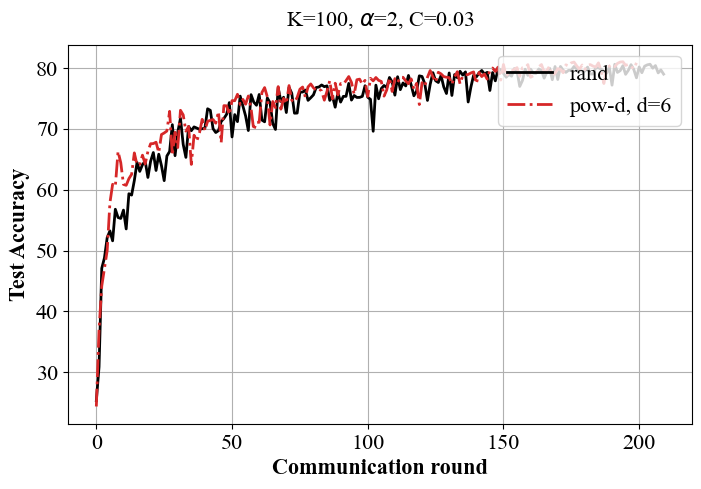

In [59]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## plot settings
# color maps reference: https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative
# line styles reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
c_t = cm.get_cmap('tab10')
ftsize = 16
params = {'legend.fontsize': ftsize,
         'axes.labelsize': ftsize,
         'axes.titlesize':ftsize,
         'xtick.labelsize':ftsize,
         'ytick.labelsize':ftsize}
plt.rcParams.update(params)
lw = 2
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.labelweight'] = 'bold'
# plt.figure(figsize=(16,14.5))
plt.subplots_adjust(right=1.1, top=0.9)
rcParams['axes.titlepad'] = 14

## experiment configurations
# key=experiment_id, value=(algo, powd, color, linestyle)
client_selection_type = {
    'rand': ('rand', 1, rand_test_acc, 'k', '-'),
    'powd6': ('pow-d', 6, powd6_test_acc, c_t(3), '-.'),
    # 'powd9': ('pow-d', 9, powd9_test_acc, c_t(0), '--'),
    # 'powd15': ('powd-d', 15, powd15_test_acc, c_t(2), (0, (1, 1)))
}

## run experiments
for key in client_selection_type.keys():
    # set seed for reproducibility
    np.random.seed(12345)

    # fetch configuration
    algo, powd, vals, color, lstyle = client_selection_type[key]
    
    # plot global loss for each configuration
    if algo =='rand' or algo =='adapow-d':
        p_label = algo
    else:
        p_label = algo+', d={}'.format(powd)
    plt.plot(vals, lw=lw, color=color, ls = lstyle, label=p_label)

# update plot settings
plt.ylabel('Test Accuracy')
plt.xlabel('Communication round')
plt.xticks()
plt.yticks()
plt.legend(loc=1)
# plt.legend(loc=4)
plt.grid()
plt.title('K=100, $\\alpha$=2, C=0.03')
# plt.show()
# plt.savefig(f'synthetic_m={sample_ratio}.pdf', bbox_inches='tight')
# plt.savefig(f'Fig4a.pdf', bbox_inches='tight')